In [1]:
from src.generator import Generator
from src.utils.utils import read_latent_vectors, loss_function, get_training_and_validation_sets_gray_scale, get_test_set_gray_scale

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
X_train_z, _ = read_latent_vectors('predictions/z_vae_gray_scale_train.pkl')
X_val_z, _ = read_latent_vectors('predictions/z_vae_gray_scale_val.pkl')
X_test_z, _ = read_latent_vectors('predictions/z_vae_gray_scale_test.pkl')

In [3]:
X_train, Y_train, cX_train, X_val, Y_val, cX_val = get_training_and_validation_sets_gray_scale()
X_test, Y_test, cX_test = get_test_set_gray_scale()

In [14]:
X_train_z.shape, X_train.shape, cX_train.shape

((4344, 1280), (4344, 1, 64, 64), (4344, 6))

In [4]:
model = Generator(
    input_dim=1280,
    conditions_dim=6,
    output_dim=[1, 64, 64],
    n_filters=[4, 4],
    kernel_size=[32, 16],
    stride=[2, 2],
    padding=['same', 'same'],
    hidden_dims=[2560],
    activation='relu',
    learning_rate=0.001,
    dropout=0.4,
    alpha=0.3, # LeakyReLU alpha
    loss_function=loss_function,
    patience=10,
    metrics=['mse', 'mae']
)

In [11]:
model.train(X_train_z, X_train, cX_train, X_val_z, X_val, cX_val, epochs=10, batch_size=32)

Epoch 1/10
136/136 [==============================] - 36s 258ms/step - loss: 0.0609 - mse: 0.0071 - mae: 0.0412 - val_loss: 0.0594 - val_mse: 0.0071 - val_mae: 0.0422
Epoch 2/10
136/136 [==============================] - 37s 273ms/step - loss: 0.0562 - mse: 0.0066 - mae: 0.0377 - val_loss: 0.0575 - val_mse: 0.0069 - val_mae: 0.0423
Epoch 3/10
136/136 [==============================] - 42s 307ms/step - loss: 0.0500 - mse: 0.0059 - mae: 0.0345 - val_loss: 0.0552 - val_mse: 0.0072 - val_mae: 0.0437
Epoch 4/10
136/136 [==============================] - 35s 261ms/step - loss: 0.0455 - mse: 0.0056 - mae: 0.0331 - val_loss: 0.0440 - val_mse: 0.0060 - val_mae: 0.0328
Epoch 5/10
136/136 [==============================] - 38s 281ms/step - loss: 0.0416 - mse: 0.0053 - mae: 0.0309 - val_loss: 0.0410 - val_mse: 0.0050 - val_mae: 0.0284
Epoch 6/10
136/136 [==============================] - 42s 308ms/step - loss: 0.0391 - mse: 0.0050 - mae: 0.0295 - val_loss: 0.0374 - val_mse: 0.0053 - val_mae: 0.028

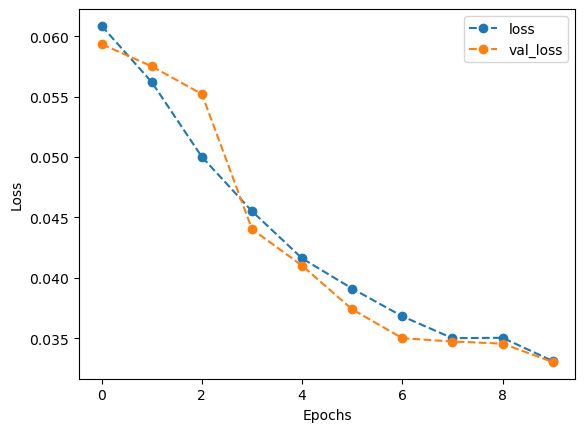

In [12]:
model.visualize_loss()

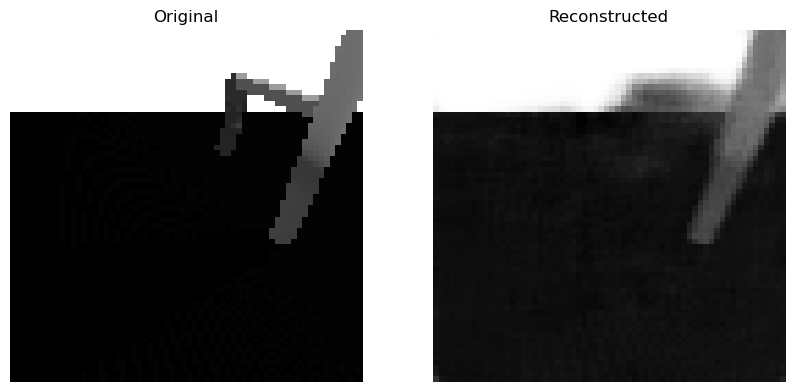

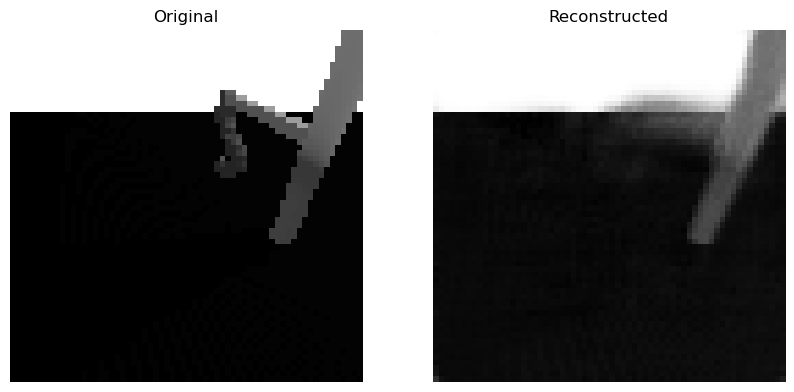

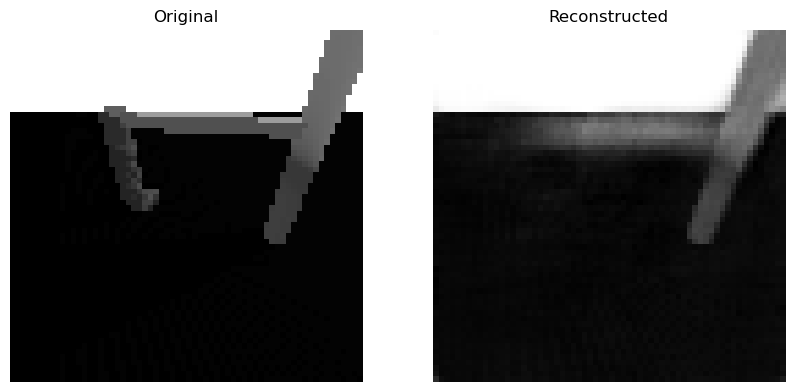

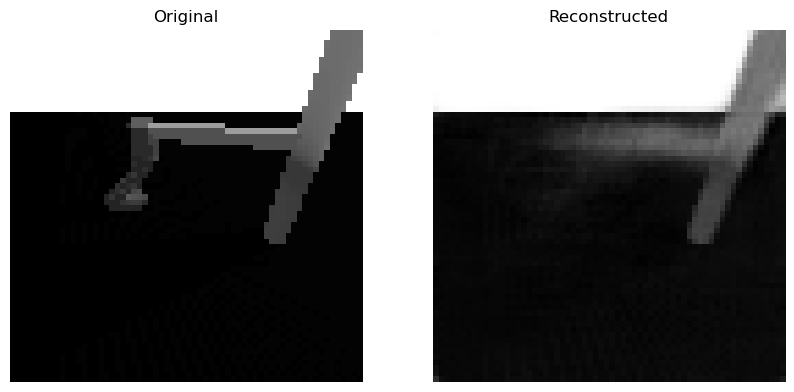

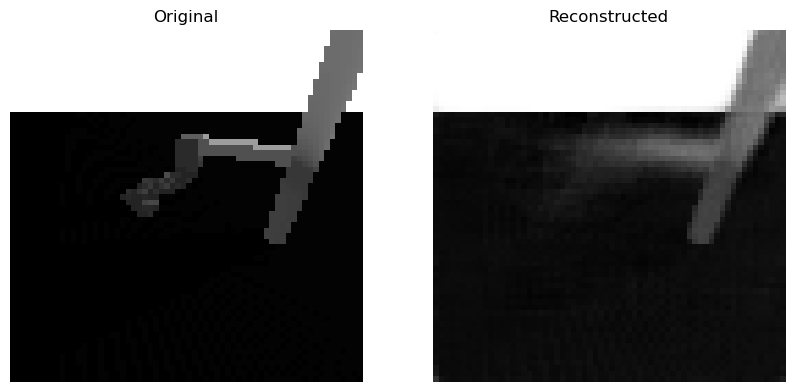

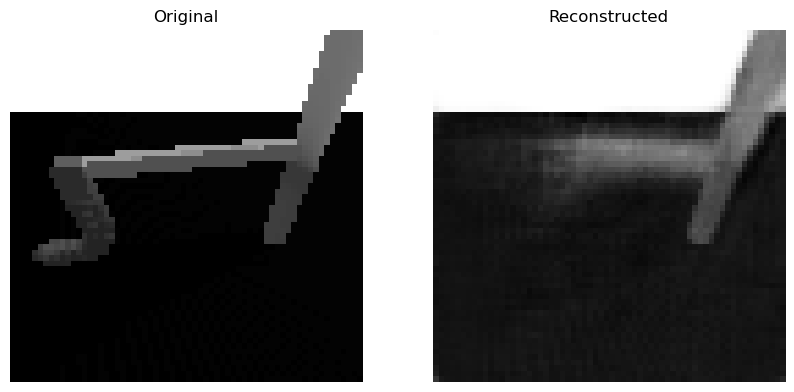

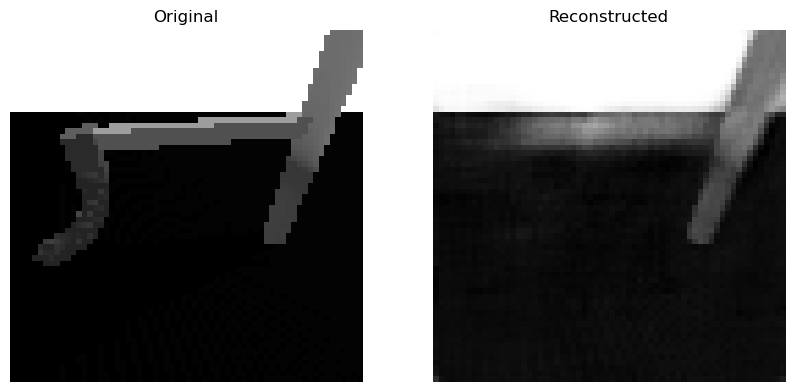

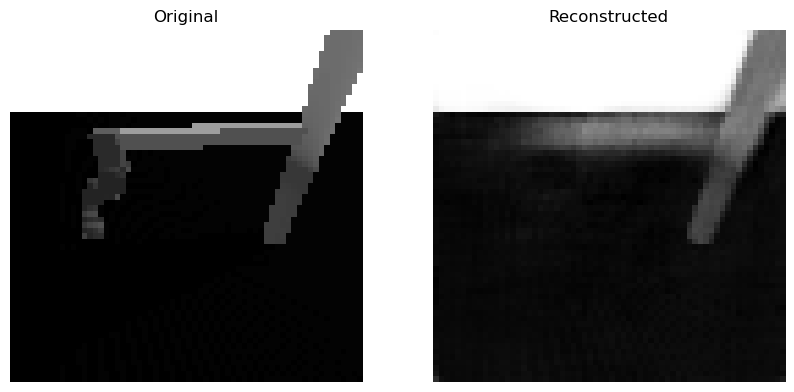

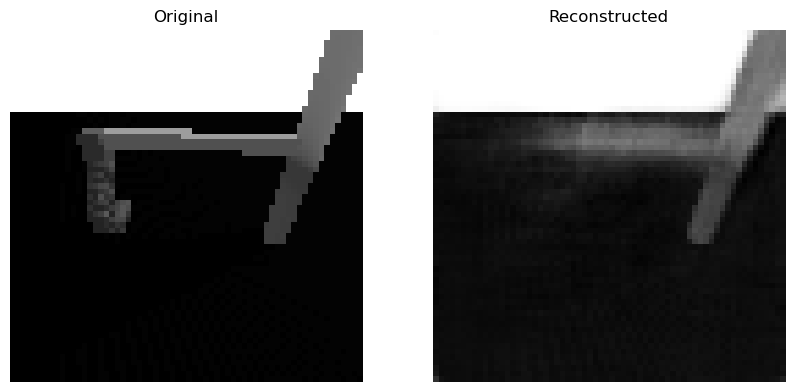

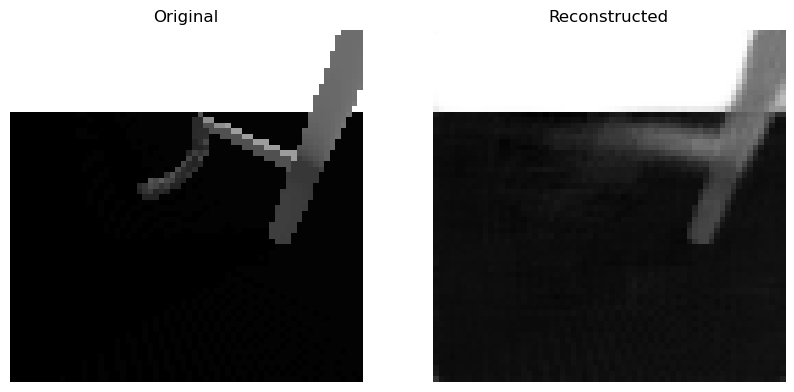

In [13]:
for i in range(10):
    model.visualize_recostruction(X_train_z[36+i*47], cX_train[36+i*47], X_train[36+i*47])